# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

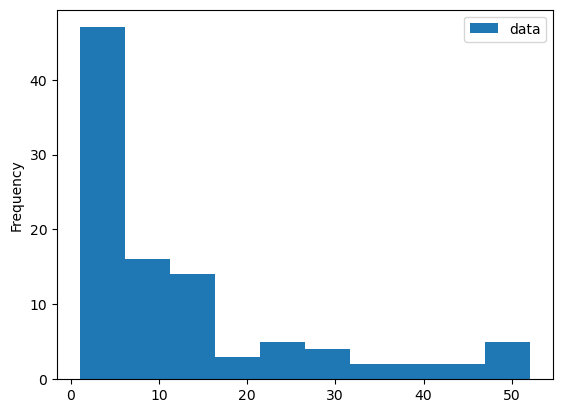

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

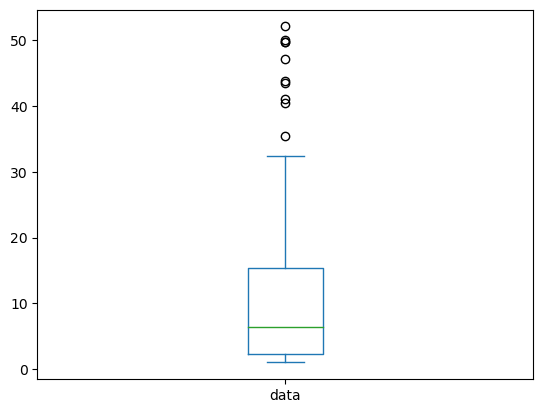

In [4]:
df.plot.box()

#### Part 2 Explanation

The histogram is useful because it shows the overall distribution and skewness of drug prices. This make it useful if you wanted to spot common price ranges. The boxplot, in contrast, summarizes some of the key statistics like the 75th percentile and if there are any outliers. For the administrator, the box plot might be more useful since its a bit more informative. 



# 3. Homework - working on your datasets

In [16]:
import pandas as pd
import numpy as np
import kagglehub
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

# Digital Marketing Project: Predicting Customer Value, Conversion, and Churn 

## Datasets: 

### 1. Marketing Campaign Dataset - https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data
### 2. Customer Churn Dataset - https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
### 3. Predict Conversion in Digital Marketing Dataset -https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/data


In [13]:
from dotenv import load_dotenv

load_dotenv()

# Set Kaggle credentials for API use
os.environ['KAGGLE_USERNAME'] = os.getenv("KAGGLE_USERNAME")
os.environ['KAGGLE_KEY'] = os.getenv("KAGGLE_KEY")

### Marketing Campaign Dataset EDA

In [7]:
#download the dataset from Kaggle
marketing_dataset_path = kagglehub.dataset_download("rodsaldanha/arketing-campaign")
print("Path to dataset files:", marketing_dataset_path)


# Define the path to the dataset file
marketing_dataset_path_to_file = os.path.join(marketing_dataset_path, "marketing_campaign.csv")

# Load the dataset
marketing_dataset_raw = pd.read_csv(marketing_dataset_path_to_file, sep=';')

# Preview the data
marketing_dataset_raw.head()

Path to dataset files: C:\Users\jalva\.cache\kagglehub\datasets\rodsaldanha\arketing-campaign\versions\8


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Plots for Marketing Data 

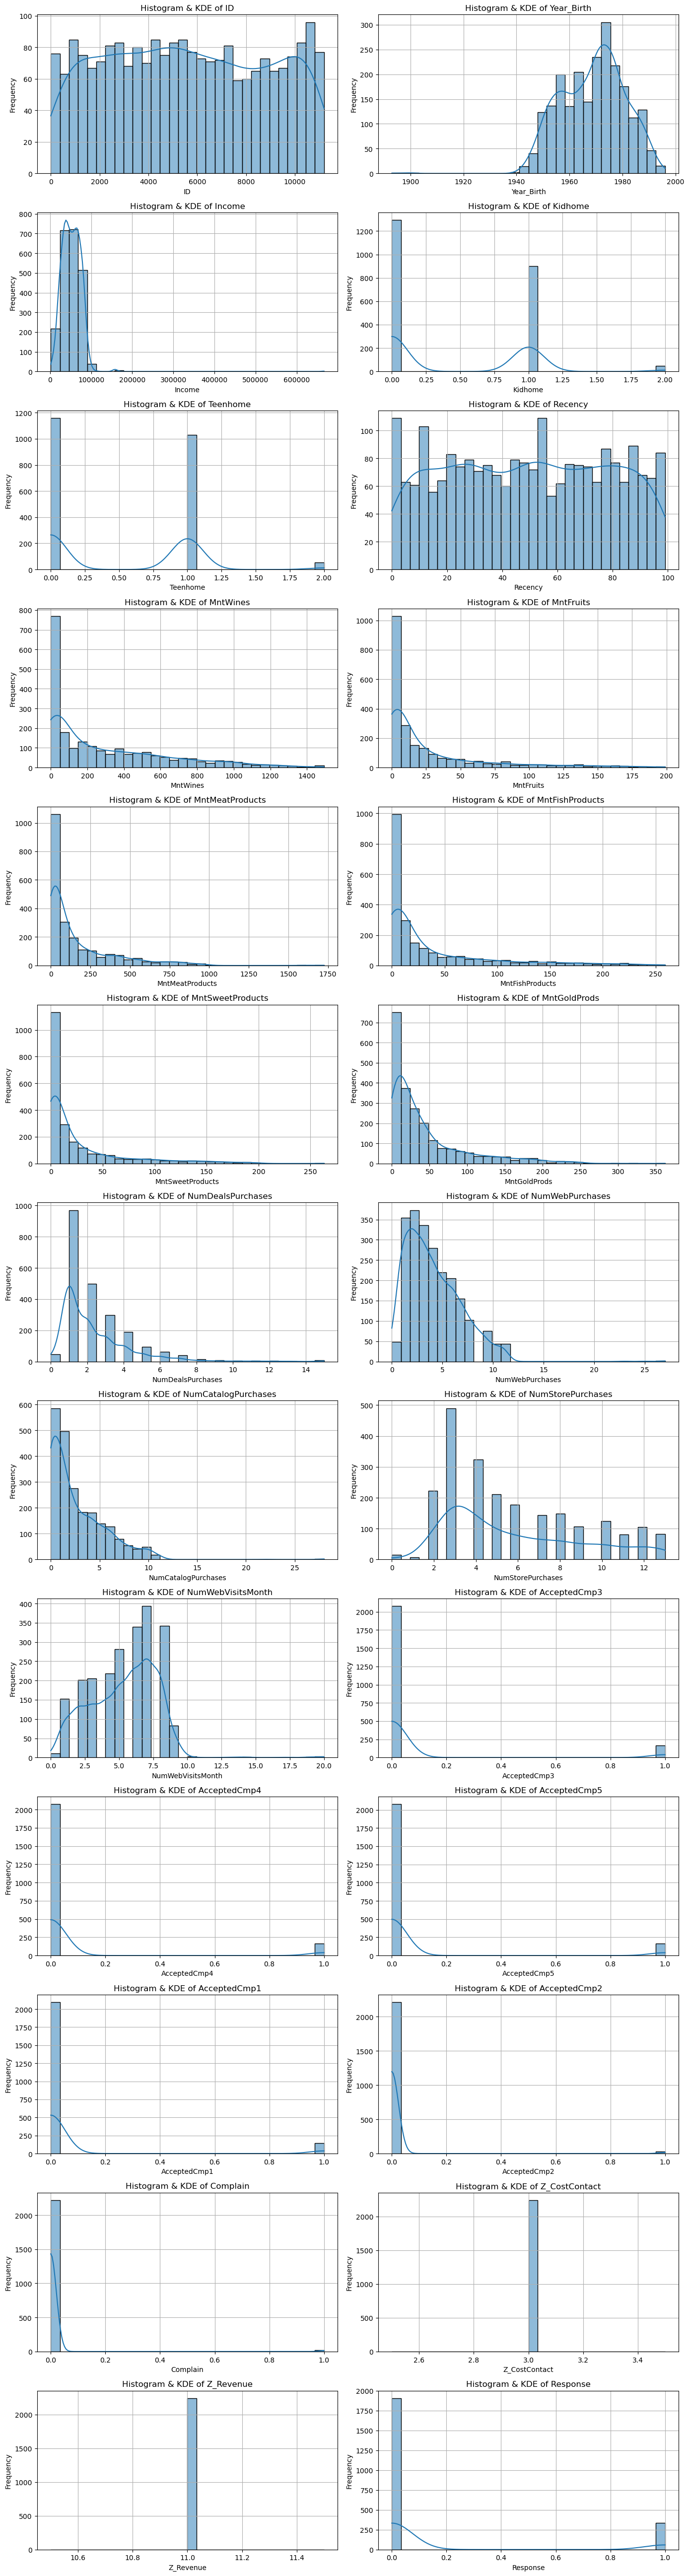

In [ ]:

num_cols = marketing_dataset_raw.select_dtypes(include=[np.number]).columns
num_features = len(num_cols)


cols = 2
rows = (num_features + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(marketing_dataset_raw[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram & KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Turn off any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
    

#### Marketing Mean, Median, Mode Marketing Data

In [8]:
#calculate mean, median, and mode for numerical columns

marketing_numerical_columns = marketing_dataset_raw.select_dtypes(include=[np.number]).columns

means = marketing_dataset_raw[marketing_numerical_columns].mean()
medians = marketing_dataset_raw[marketing_numerical_columns].median()
modes = marketing_dataset_raw[marketing_numerical_columns].mode().iloc[0]

marketing_summary_statistics = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

print("\nSummary statistics for numerical columns:")
print(marketing_summary_statistics)


Summary statistics for numerical columns:
                             Mean   Median    Mode
ID                    5592.159821   5458.5     0.0
Year_Birth            1968.805804   1970.0  1976.0
Income               52247.251354  51381.5  7500.0
Kidhome                  0.444196      0.0     0.0
Teenhome                 0.506250      0.0     0.0
Recency                 49.109375     49.0    56.0
MntWines               303.935714    173.5     2.0
MntFruits               26.302232      8.0     0.0
MntMeatProducts        166.950000     67.0     7.0
MntFishProducts         37.525446     12.0     0.0
MntSweetProducts        27.062946      8.0     0.0
MntGoldProds            44.021875     24.0     1.0
NumDealsPurchases        2.325000      2.0     1.0
NumWebPurchases          4.084821      4.0     2.0
NumCatalogPurchases      2.662054      2.0     0.0
NumStorePurchases        5.790179      5.0     3.0
NumWebVisitsMonth        5.316518      6.0     7.0
AcceptedCmp3             0.072768      

### Customer Churn Dataset 

In [9]:
#import dataset from kaggle 
churn_dataset_path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")
print("Path to dataset files:", churn_dataset_path)

# Define the path to the dataset file
churn_dataset_path_to_file = os.path.join(churn_dataset_path, "customer_churn_dataset-training-master.csv")

# Load the dataset
churn_dataset_raw = pd.read_csv(churn_dataset_path_to_file)

#drop rows with missing values
churn_dataset_cleaned = churn_dataset_raw.dropna()

# Preview the data
churn_dataset_cleaned.head()

Path to dataset files: C:\Users\jalva\.cache\kagglehub\datasets\muhammadshahidazeem\customer-churn-dataset\versions\1


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


#### Customer Churn Charts

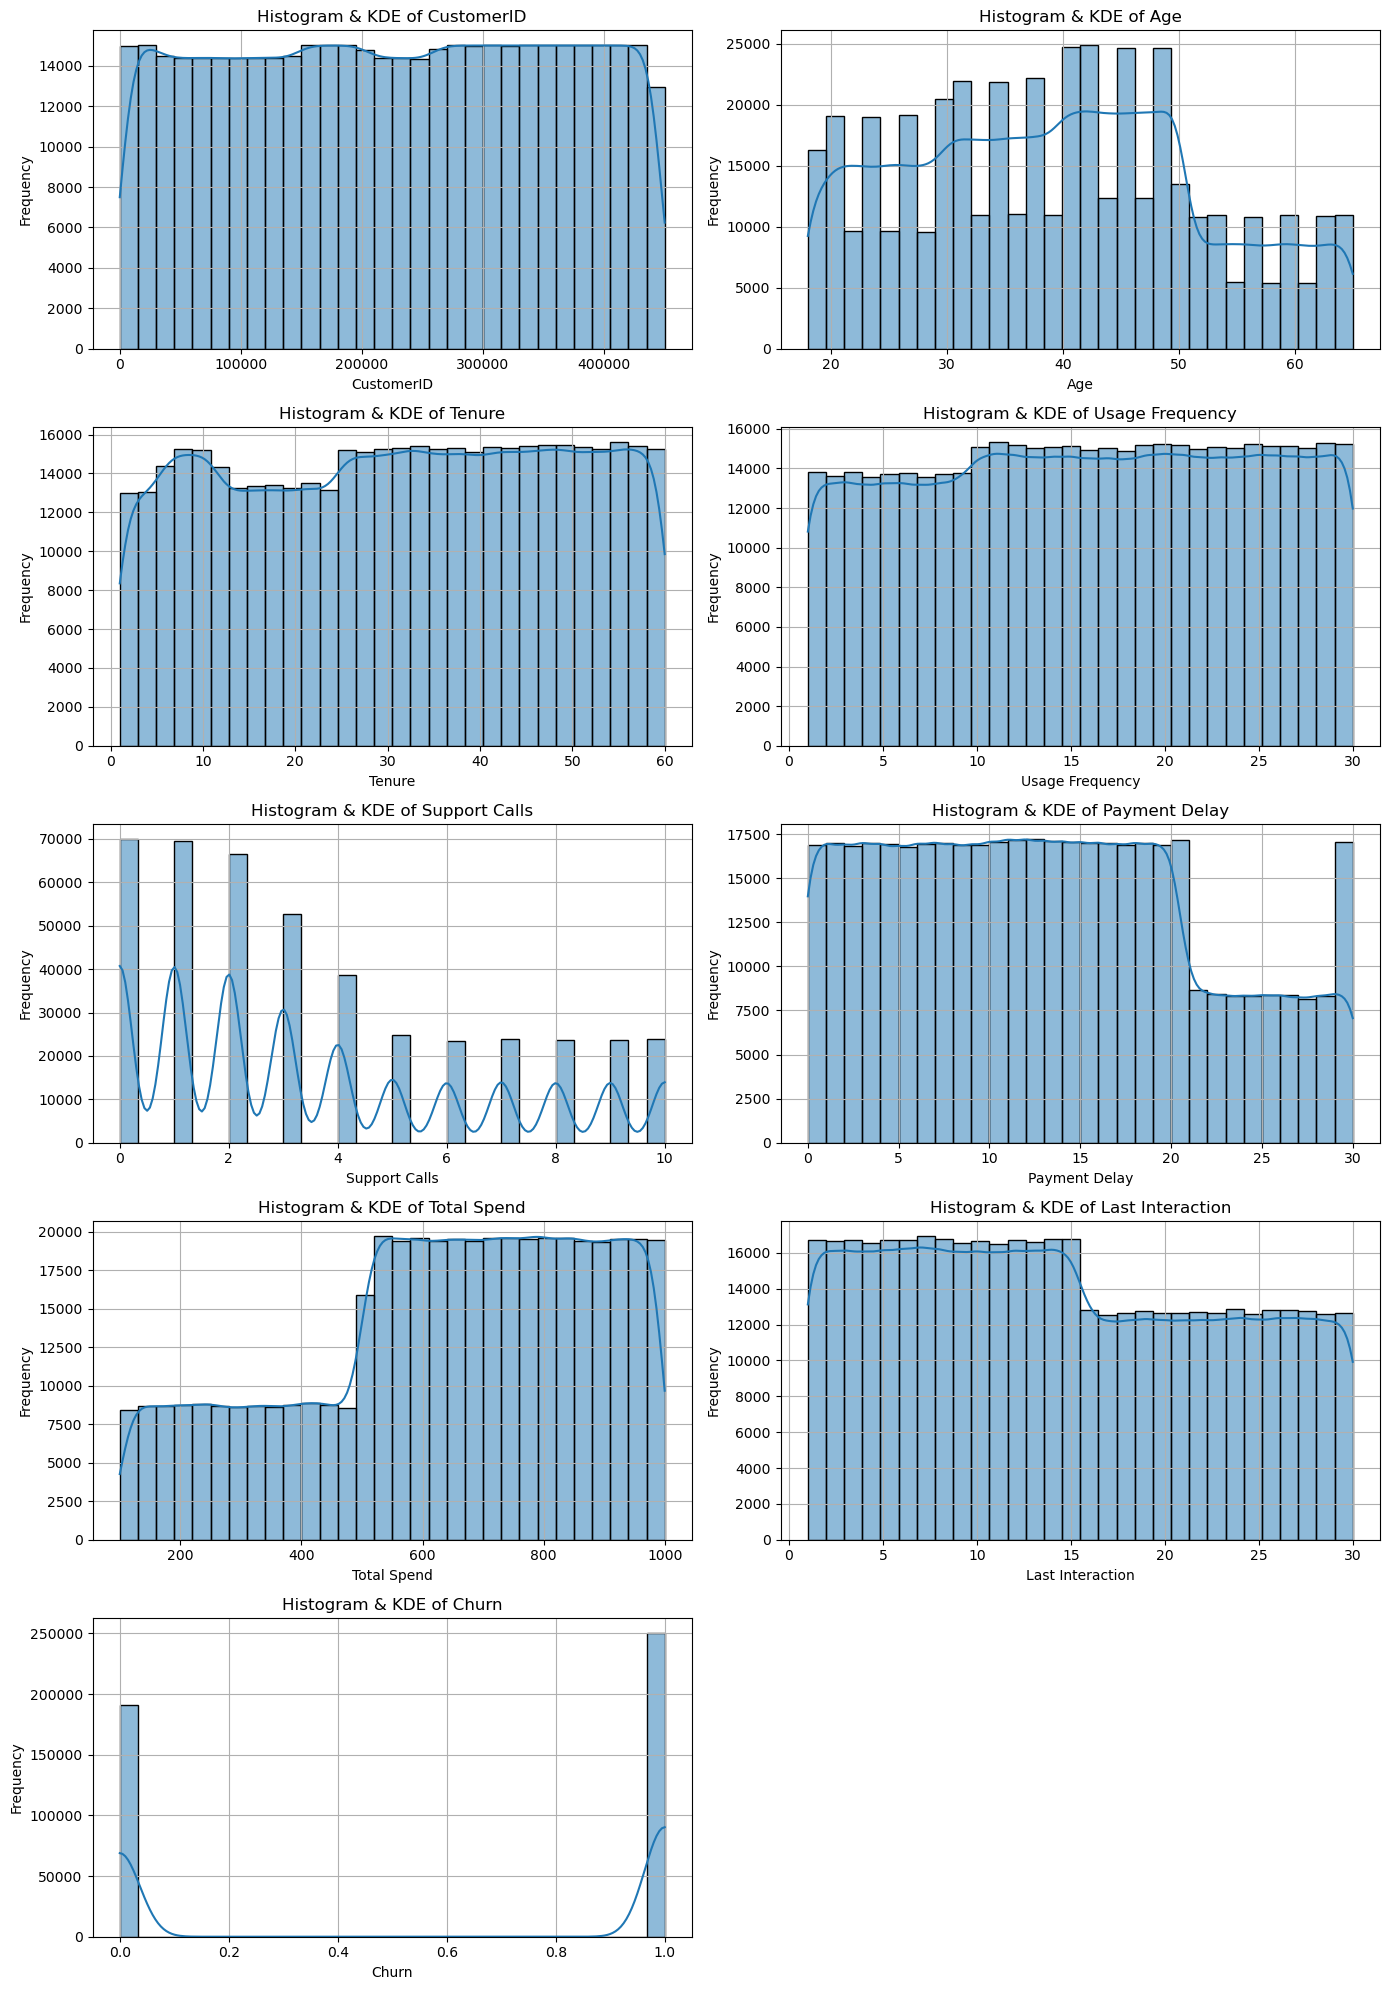

In [20]:
num_cols = churn_dataset_cleaned.select_dtypes(include=[np.number]).columns
num_features = len(num_cols)


cols = 2
rows = (num_features + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(churn_dataset_cleaned[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram & KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Turn off any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Churn Mean, Median, and Mode

In [10]:
#calculate mean, median, and mode for numerical columns in churn dataset
churn_numerical_columns = churn_dataset_cleaned.select_dtypes(include=[np.number]).columns

means_churn = churn_dataset_cleaned[churn_numerical_columns].mean()
medians_churn = churn_dataset_cleaned[churn_numerical_columns].median()
modes_churn = churn_dataset_cleaned[churn_numerical_columns].mode().iloc[0]

churn_summary_statistics = pd.DataFrame({
    'Mean': means_churn,
    'Median': medians_churn,
    'Mode': modes_churn
})

print("\nSummary statistics for numerical columns in churn dataset:")
print(churn_summary_statistics)


Summary statistics for numerical columns in churn dataset:
                           Mean    Median   Mode
CustomerID        225398.667955  226125.5    2.0
Age                   39.373153      39.0   50.0
Tenure                31.256336      32.0   32.0
Usage Frequency       15.807494      16.0   11.0
Support Calls          3.604437       3.0    0.0
Payment Delay         12.965722      12.0   12.0
Total Spend          631.616223     661.0  234.0
Last Interaction      14.480868      14.0    7.0
Churn                  0.567107       1.0    1.0


### Conversion Dataset

In [11]:
# import predict conversion dataset from Kaggle
predict_conversion_dataset_path = kagglehub.dataset_download("rabieelkharoua/predict-conversion-in-digital-marketing-dataset")

print("Path to dataset files:", predict_conversion_dataset_path)

# Define the path to the dataset file
predict_conversion_dataset_path_to_file = os.path.join(predict_conversion_dataset_path, "digital_marketing_campaign_dataset.csv")

# Load the dataset
predict_conversion_dataset_raw = pd.read_csv(predict_conversion_dataset_path_to_file)

# Preview the data
predict_conversion_dataset_raw.head()

Path to dataset files: C:\Users\jalva\.cache\kagglehub\datasets\rabieelkharoua\predict-conversion-in-digital-marketing-dataset\versions\1


,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


#### Conversion Plots 

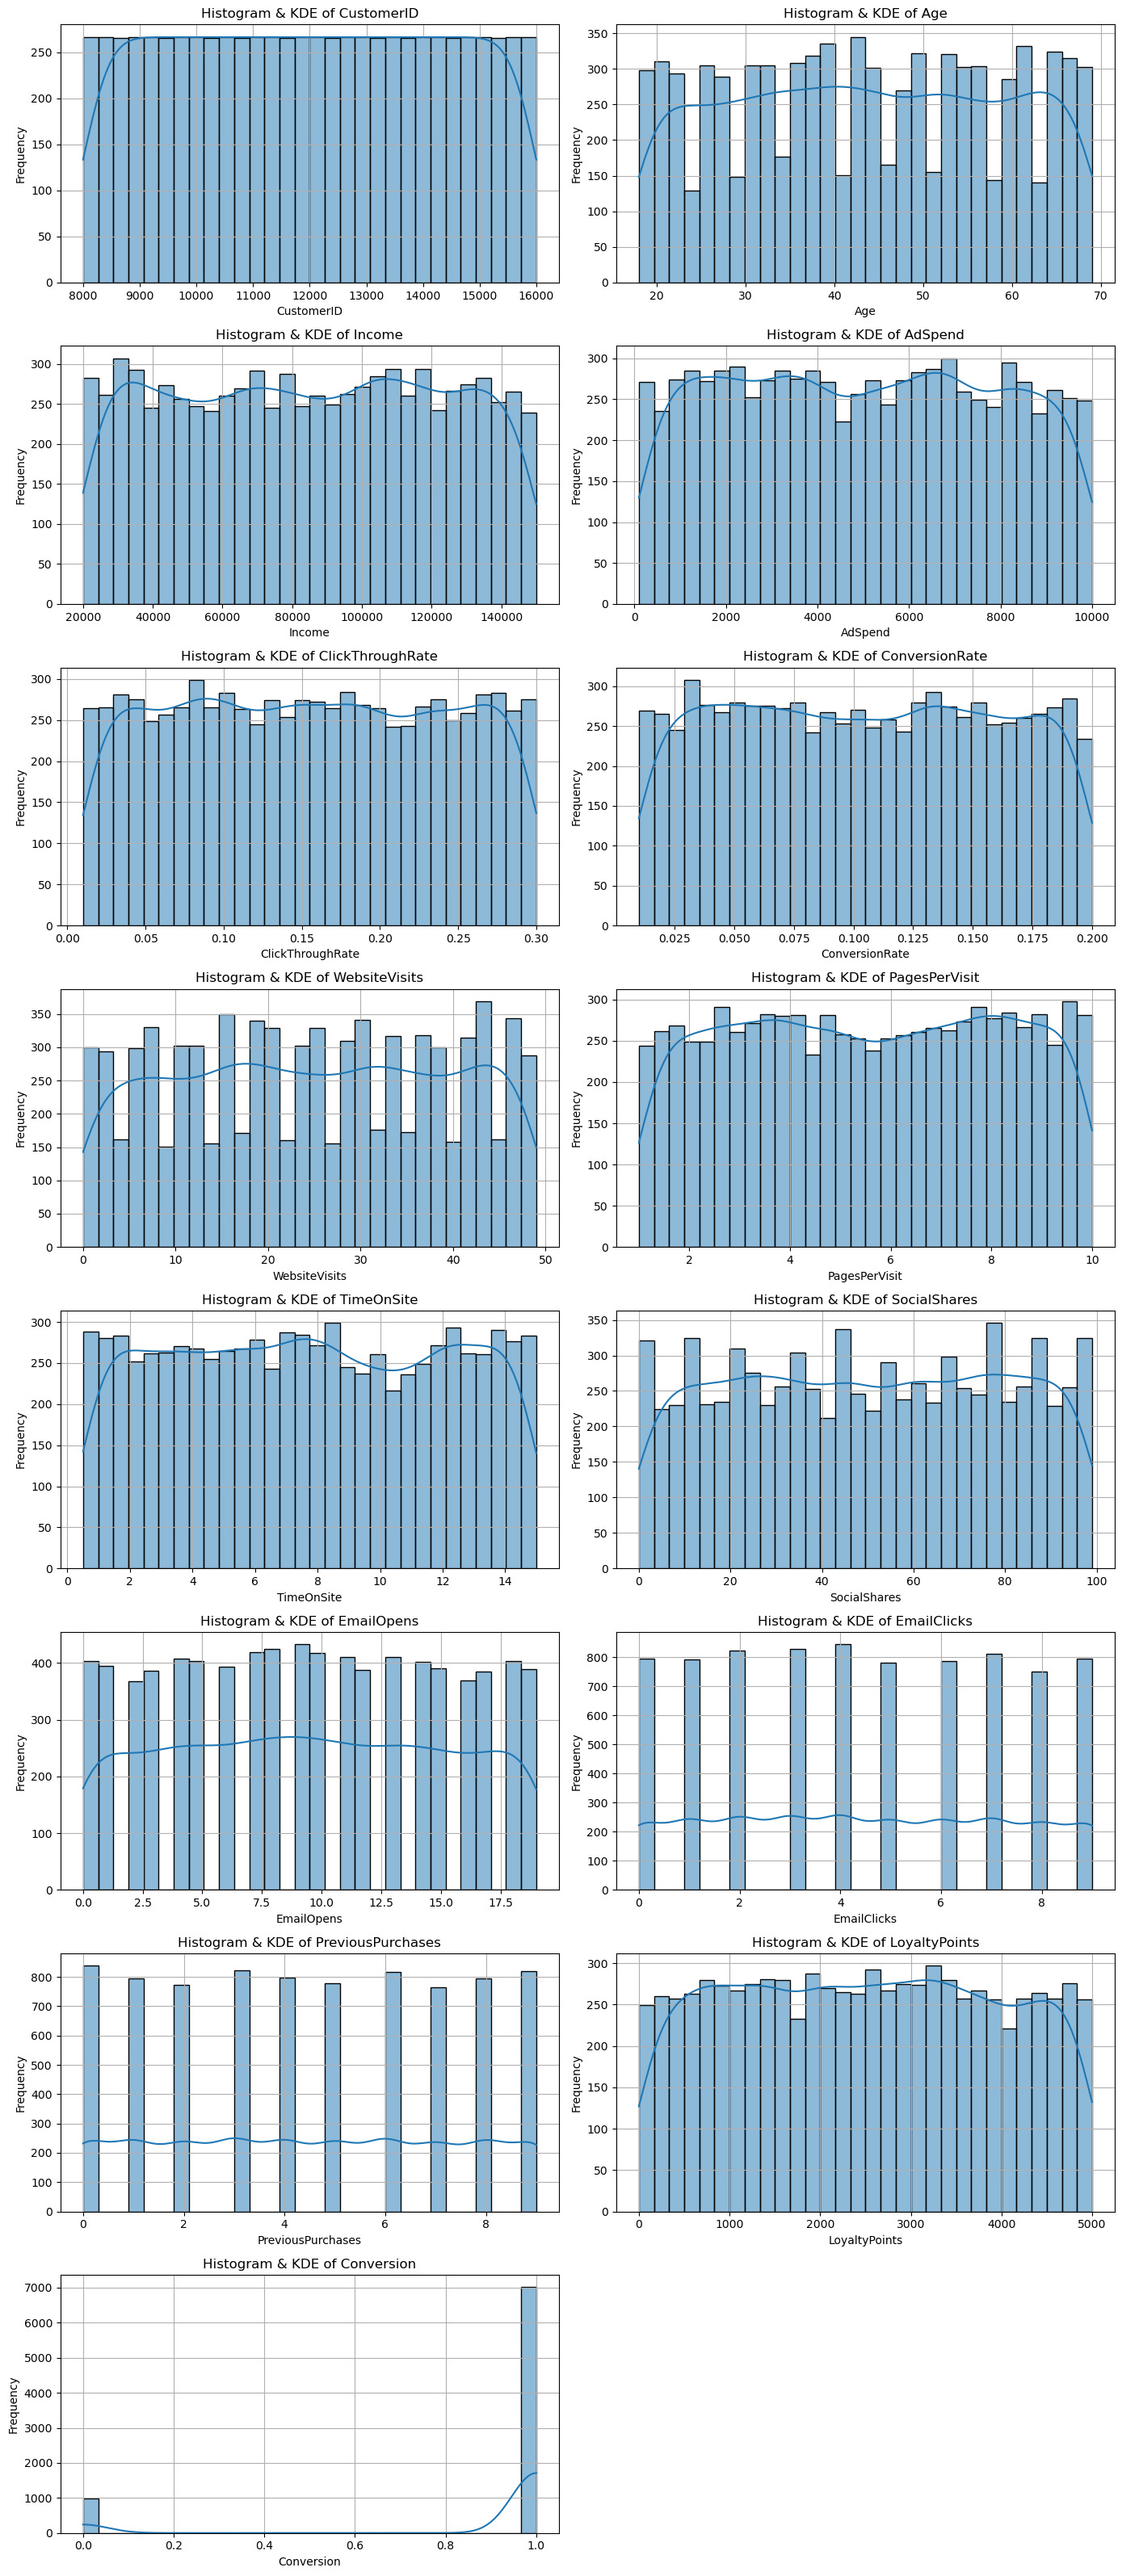

In [21]:
num_cols = predict_conversion_dataset_raw.select_dtypes(include=[np.number]).columns
num_features = len(num_cols)


cols = 2
rows = (num_features + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(predict_conversion_dataset_raw[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram & KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Turn off any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Conversion Mean, Median, and Mode

In [12]:
#calculate mean, median, and mode for numerical columns in predict conversion dataset

predict_conversion_numerical_columns = predict_conversion_dataset_raw.select_dtypes(include=[np.number]).columns

means_predict_conversion = predict_conversion_dataset_raw[predict_conversion_numerical_columns].mean()
medians_predict_conversion = predict_conversion_dataset_raw[predict_conversion_numerical_columns].median()
modes_predict_conversion = predict_conversion_dataset_raw[predict_conversion_numerical_columns].mode().iloc[0]

predict_conversion_summary_statistics = pd.DataFrame({
    'Mean': means_predict_conversion,
    'Median': medians_predict_conversion,
    'Mode': modes_predict_conversion
})

print("\nSummary statistics for numerical columns in predict conversion dataset:")
print(predict_conversion_summary_statistics)



Summary statistics for numerical columns in predict conversion dataset:
                           Mean        Median          Mode
CustomerID         11999.500000  11999.500000   8000.000000
Age                   43.625500     43.000000     64.000000
Income             84664.196750  84926.500000  50268.000000
AdSpend             5000.944830   5013.440044    100.054813
ClickThroughRate       0.154829      0.154505      0.010005
ConversionRate         0.104389      0.104046      0.010018
WebsiteVisits         24.751625     25.000000     25.000000
PagesPerVisit          5.549299      5.534257      1.000428
TimeOnSite             7.727718      7.682956      0.501669
SocialShares          49.799750     50.000000     61.000000
EmailOpens             9.476875      9.000000      9.000000
EmailClicks            4.467375      4.000000      4.000000
PreviousPurchases      4.485500      4.000000      0.000000
LoyaltyPoints       2490.268500   2497.000000   1392.000000
Conversion             0.87

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

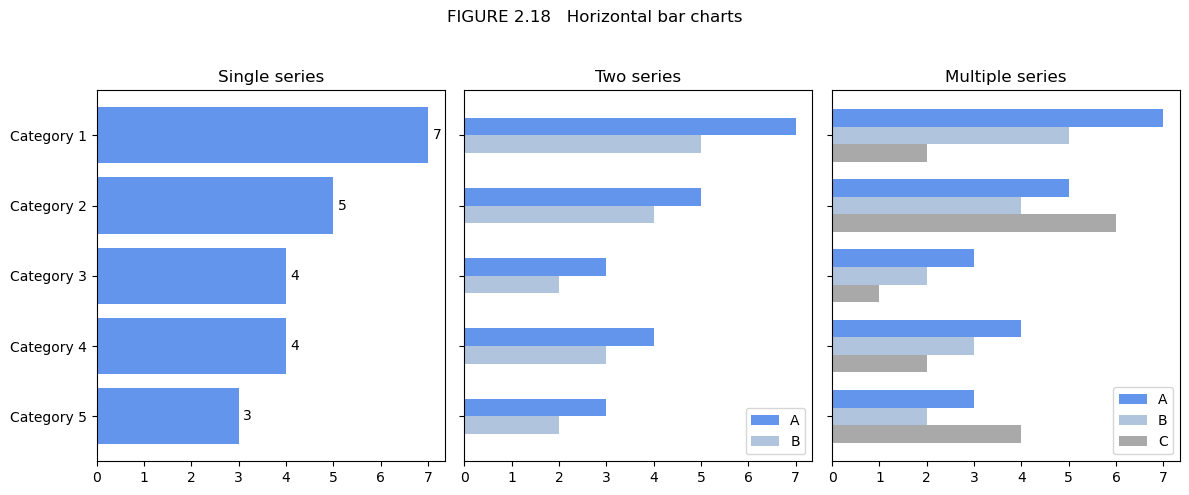

In [22]:

# Data
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
single_series = [7, 5, 4, 4, 3]
two_series_A = [7, 5, 3, 4, 3]
two_series_B = [5, 4, 2, 3, 2]
multi_series_A = [7, 5, 3, 4, 3]
multi_series_B = [5, 4, 2, 3, 2]
multi_series_C = [2, 6, 1, 2, 4]

# Position for each bar
y_pos = np.arange(len(categories))
bar_height = 0.25

# Create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
fig.suptitle('FIGURE 2.18   Horizontal bar charts', fontsize=12)

# Single series
axs[0].barh(y_pos, single_series, color='cornflowerblue')
for i, v in enumerate(single_series):
    axs[0].text(v + 0.1, i, str(v), va='center')
axs[0].set_yticks(y_pos)
axs[0].set_yticklabels(categories)
axs[0].invert_yaxis()
axs[0].set_title('Single series')

# Two series
axs[1].barh(y_pos - bar_height/2, two_series_A, height=bar_height, label='A', color='cornflowerblue')
axs[1].barh(y_pos + bar_height/2, two_series_B, height=bar_height, label='B', color='lightsteelblue')
axs[1].set_yticks(y_pos)
axs[1].set_yticklabels(categories)
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title('Two series')

# Multiple series
axs[2].barh(y_pos - bar_height, multi_series_A, height=bar_height, label='A', color='cornflowerblue')
axs[2].barh(y_pos, multi_series_B, height=bar_height, label='B', color='lightsteelblue')
axs[2].barh(y_pos + bar_height, multi_series_C, height=bar_height, label='C', color='darkgray')
axs[2].set_yticks(y_pos)
axs[2].set_yticklabels(categories)
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title('Multiple series')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()